# **Sésame, ouvre-toi:** *Analyse exploratoire* 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from datetime import datetime


### Récuperation de la données

In [3]:
compas_scores = pd.read_csv('/content/drive/MyDrive/compas_data/compas-scores-raw.csv')
violent_parsed = pd.read_csv('/content/drive/MyDrive/compas_data/cox-violent-parsed.csv')
violent_parsed_filt = pd.read_csv('/content/drive/MyDrive/compas_data/cox-violent-parsed_filt.csv')
propublica_data = pd.read_csv('/content/drive/MyDrive/compas_data/propublica_data_for_fairml.csv')

# Analyse de la Compas scores Data


In [4]:
compas_scores

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


In [5]:
# Des visualisation des informations sur la data set
compas_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

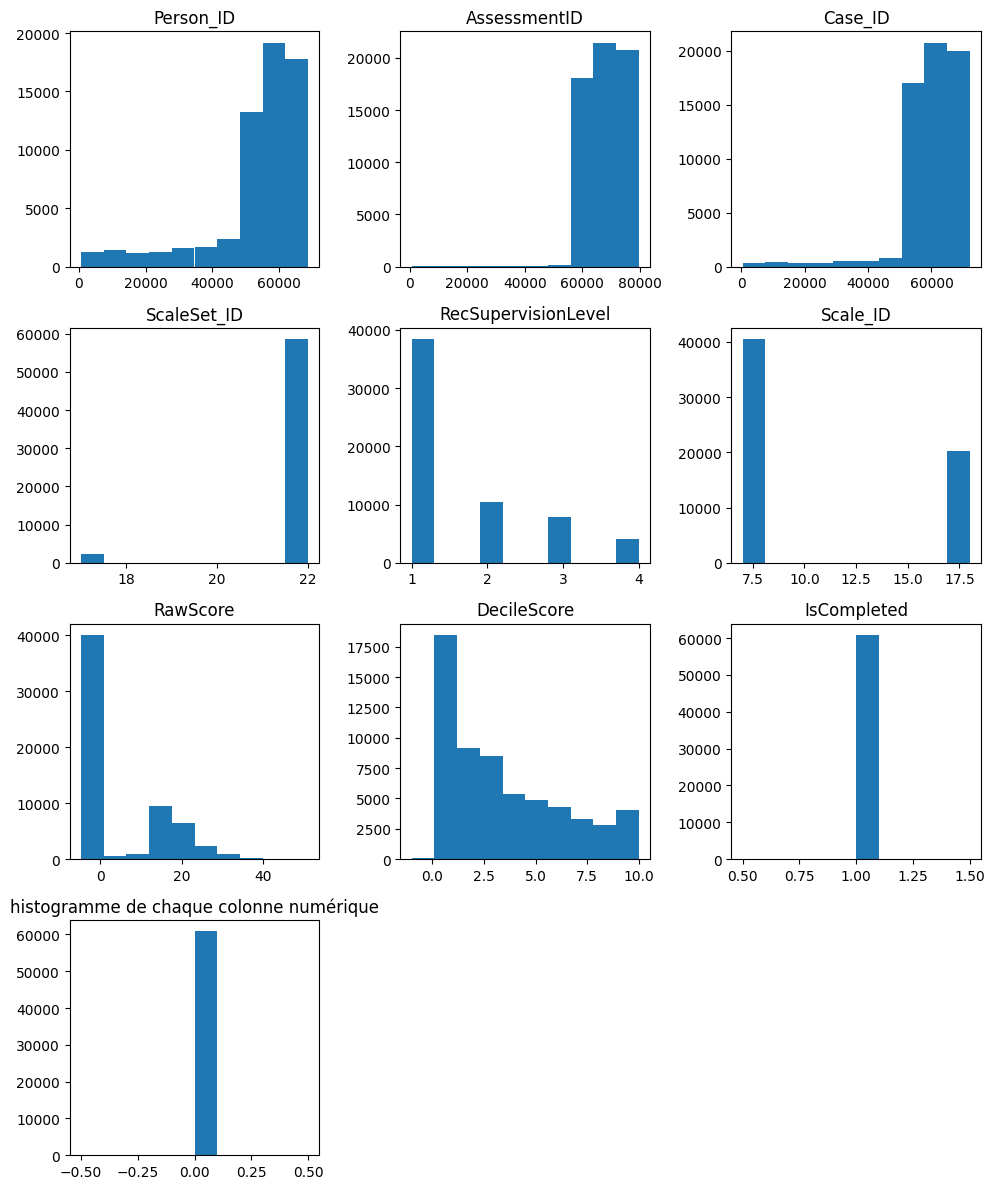

In [53]:
# Tracé de l'histogramme de chaque colonne numérique

numeric_cols = compas_scores.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Calcul du nombre de lignes et de colonnes nécessaires pour afficher les histogrammes
num_cols = len(numeric_cols)
num_rows = (num_cols - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 3*num_rows))

for i, col in enumerate(numeric_cols):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    ax.hist(compas_scores[col].dropna(), bins=10)
    ax.set_title(col)

# Suppression des axes inutiles
for i in range(num_cols, num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

# Ajustement des espacements entre les graphiques
fig.tight_layout()
plt.title("histogramme de chaque colonne numérique")


plt.show()

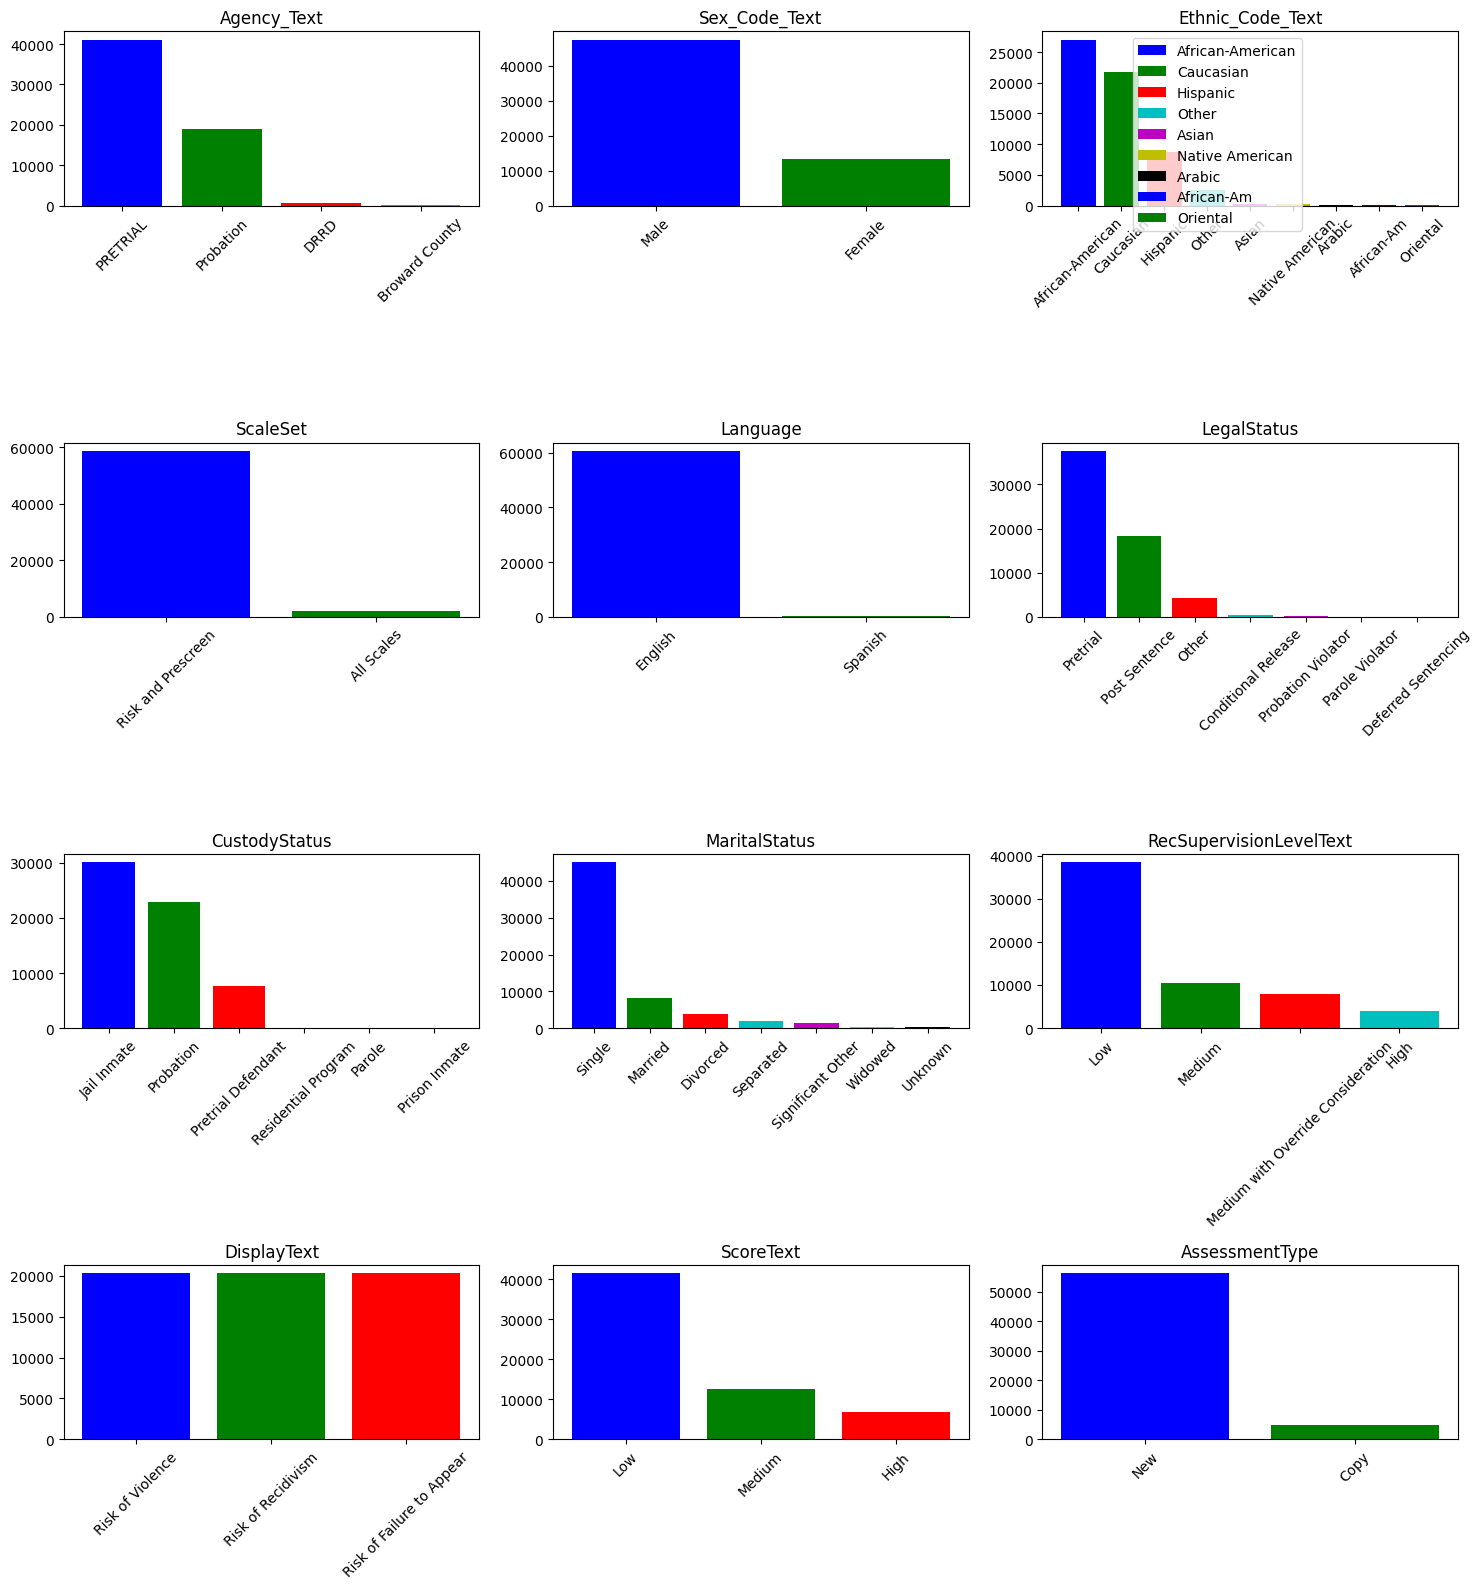

In [7]:
# Tracé de l'histogramme de chaque colonne catégorielle

# Sélection des colonnes catégorielles
x= compas_scores[['Agency_Text','Sex_Code_Text', 'Ethnic_Code_Text','ScaleSet',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus','RecSupervisionLevel', 
        'RecSupervisionLevelText','DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType']]
categorical_cols = x.select_dtypes(include=["object"]).columns.tolist()

# Calcul du nombre de lignes et de colonnes nécessaires pour afficher les diagrammes en bande
num_cols = len(categorical_cols)
num_rows = (num_cols - 1) // 3 + 1

# Spécification des couleurs pour chaque catégorie
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Tracé du diagramme en bande pour chaque colonne catégorielle
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4*num_rows))

for i, col in enumerate(categorical_cols):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    counts = x[col].value_counts()
    bars = ax.bar(counts.index, counts, color=colors[:len(counts)])
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)
    # Ajout d'une légende pour les couleurs
    if len(counts) > len(colors):
        ax.legend(bars, counts.index, bbox_to_anchor=(0.2, 1), loc='upper left')

# Suppression des axes inutiles
for i in range(num_cols, num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

# Ajustement des espacements entre les graphiques
fig.tight_layout()

plt.show()

<Axes: >

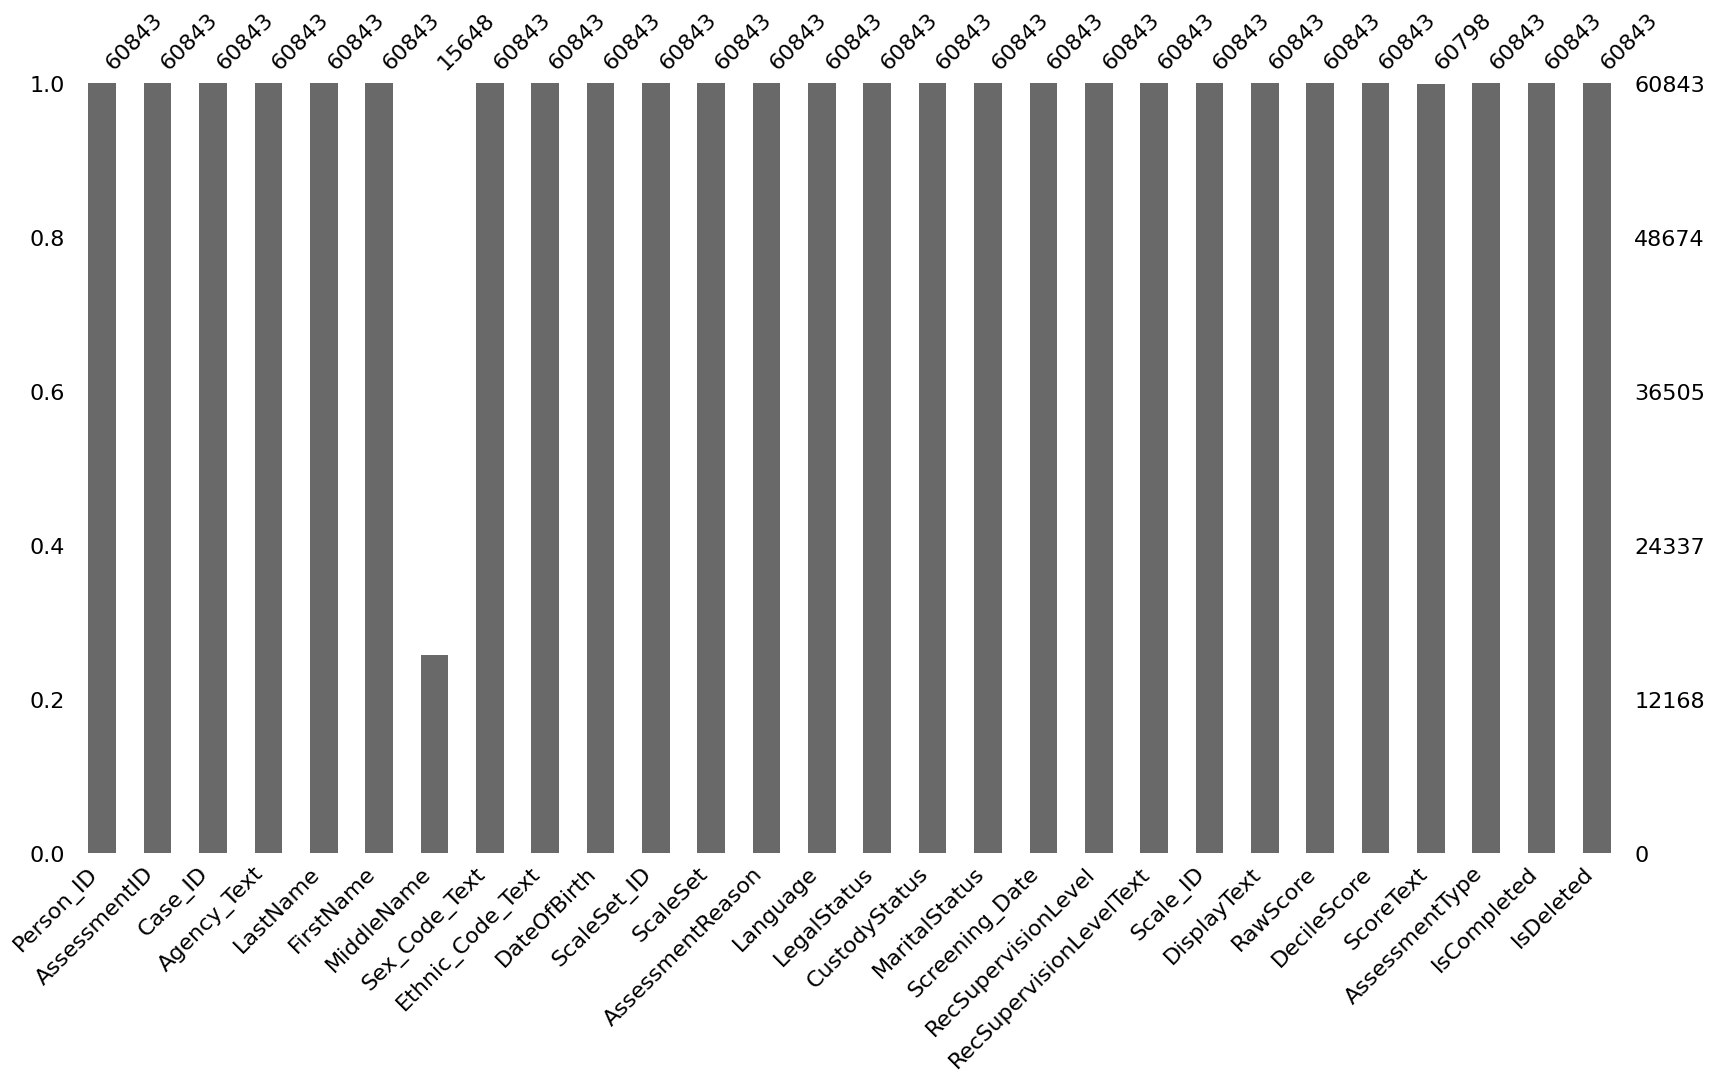

In [8]:
#Visualisation des valeurs manquantes

msno.bar(compas_scores, figsize=(20, 10))

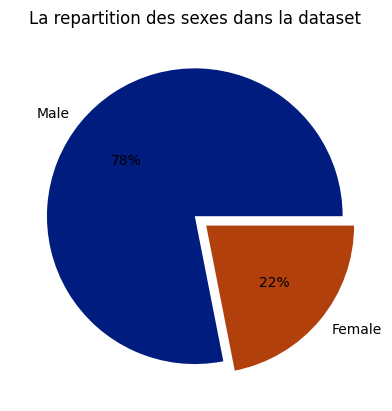

In [54]:
# La repartition des sexes dans la dataset
sex_value= compas_scores['Sex_Code_Text'].value_counts()
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

plt.pie(sex_value, labels=sex_value.index, colors=palette_color,explode=explode, autopct='%.0f%%')
plt.title("La repartition des sexes dans la dataset")

plt.show()


Après une première visualisation des races, je me suis rendu compte que la classe Africaine am était un mauvais encodage de la classe African-american alors je les ai remplacé par les vraies

In [10]:
compas_scores['Ethnic_Code_Text'] = compas_scores['Ethnic_Code_Text'].replace('African-Am', "African-American")

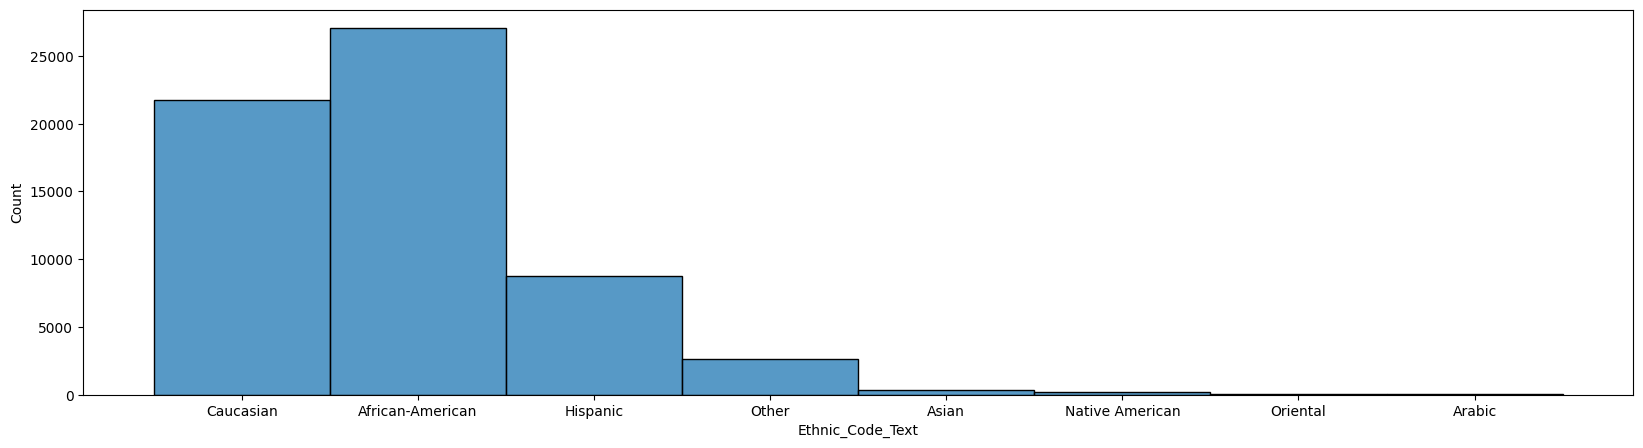

In [11]:
# Visualisation de la distribution de chaque race
plt.figure(figsize=(20, 5))
sns.histplot(compas_scores['Ethnic_Code_Text'], kde=False)
plt.title("La repartition des origines dans la dataset")

plt.show()

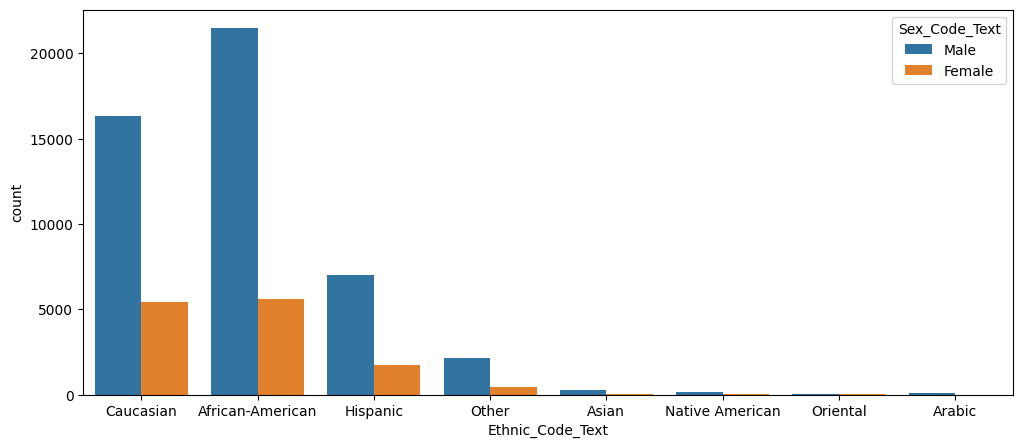

In [55]:

# Distribution des races en fonctions du sexe
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Ethnic_Code_Text', hue='Sex_Code_Text')
plt.title("Distribution  des sexes en fonction du  sexes")

plt.show()

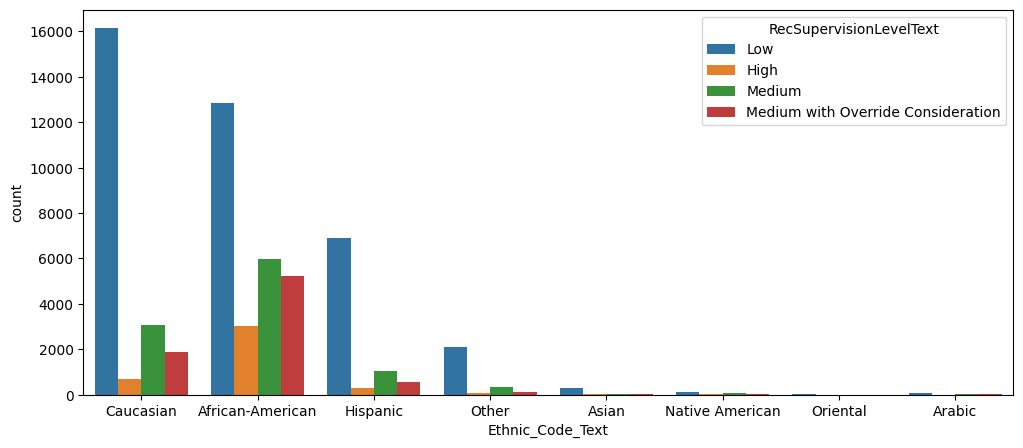

In [13]:
# Distribution de la race en fonction des niveau de supervision
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Ethnic_Code_Text', hue='RecSupervisionLevelText')
plt.title("Distribution  des origines en fonction du  rec supervision")

plt.show()

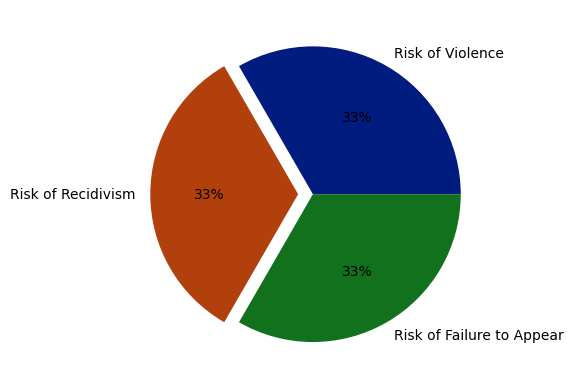

In [14]:
DisplayText= compas_scores['DisplayText'].value_counts()
explode_ = [0, 0.1,0]
palette_color = sns.color_palette('dark')
plt.pie(DisplayText, labels=DisplayText.index, colors=palette_color,explode=explode_, autopct='%.0f%%')
plt.title("La repartition des risques dans la dataset")

plt.show()


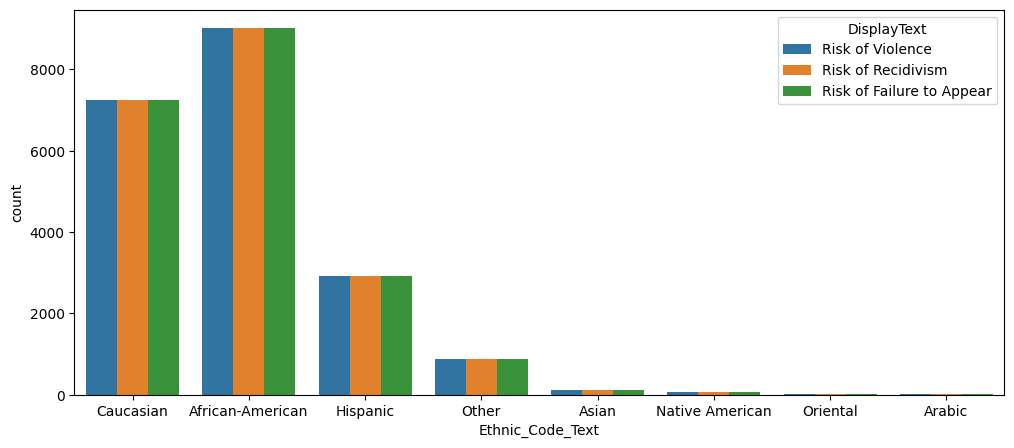

In [15]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Ethnic_Code_Text', hue='DisplayText')
plt.title("Distribution  des origines en fonction des risques")

plt.show()

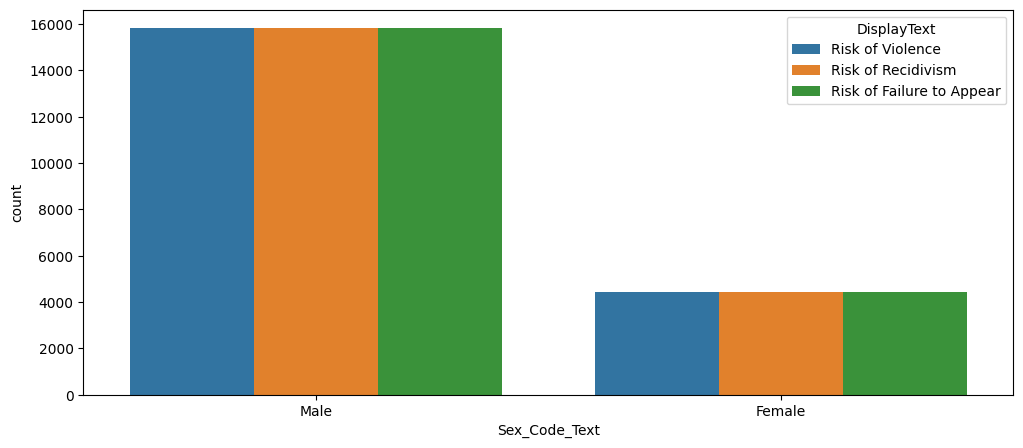

In [16]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Sex_Code_Text', hue='DisplayText')
plt.title("Distribution  des sexes en fonction du risques")

plt.show()

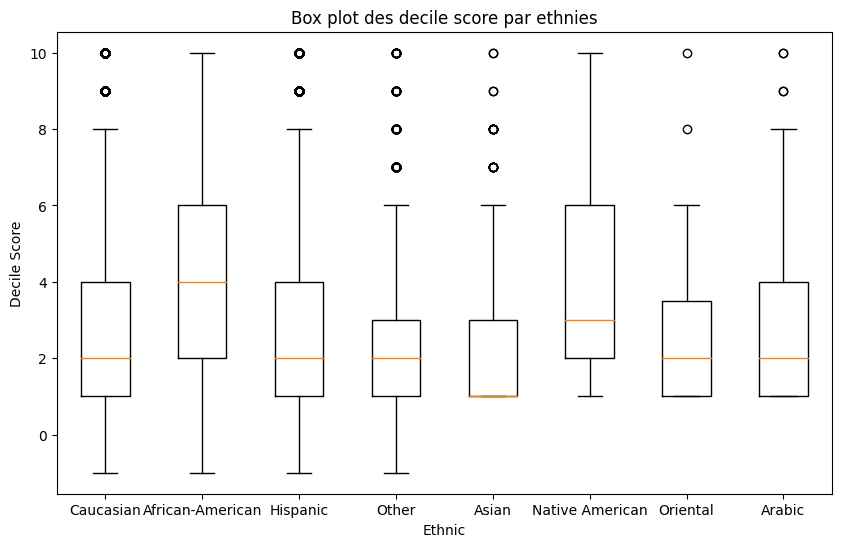

In [17]:
# Box plot des decilescore sur les ethnies
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(
    [compas_scores[compas_scores['Ethnic_Code_Text'] == z]['DecileScore'] for z in compas_scores['Ethnic_Code_Text'].unique()],
    labels=compas_scores['Ethnic_Code_Text'].unique()
)

ax.set_xlabel('Ethnic')
ax.set_ylabel('Decile Score')
ax.set_title('Box plot des decile score par ethnies')
plt.show()

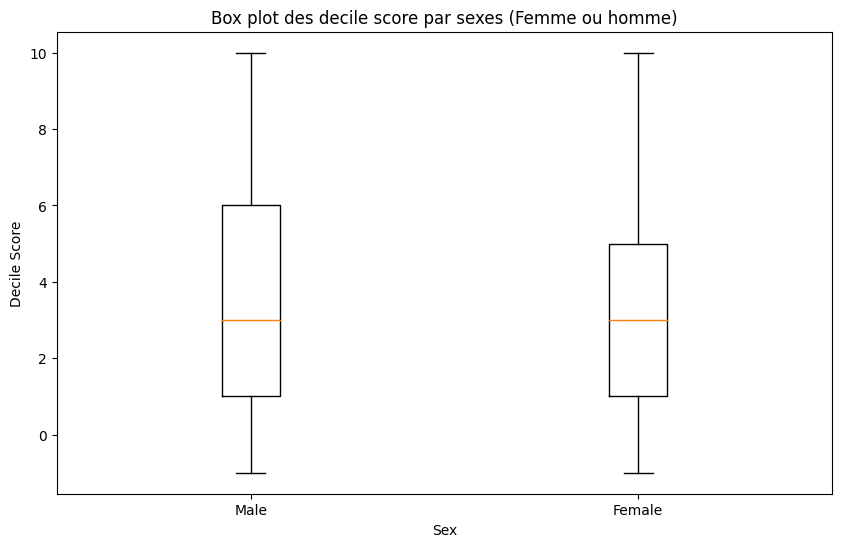

In [18]:
# Box plot des decile score par sexes
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(
    [compas_scores[compas_scores['Sex_Code_Text'] == z]['DecileScore'] for z in compas_scores['Sex_Code_Text'].unique()],
    labels=compas_scores['Sex_Code_Text'].unique()
)

ax.set_xlabel('Sex')
ax.set_ylabel('Decile Score')
ax.set_title('Box plot des decile score par sexes (Femme ou homme)')
plt.show()


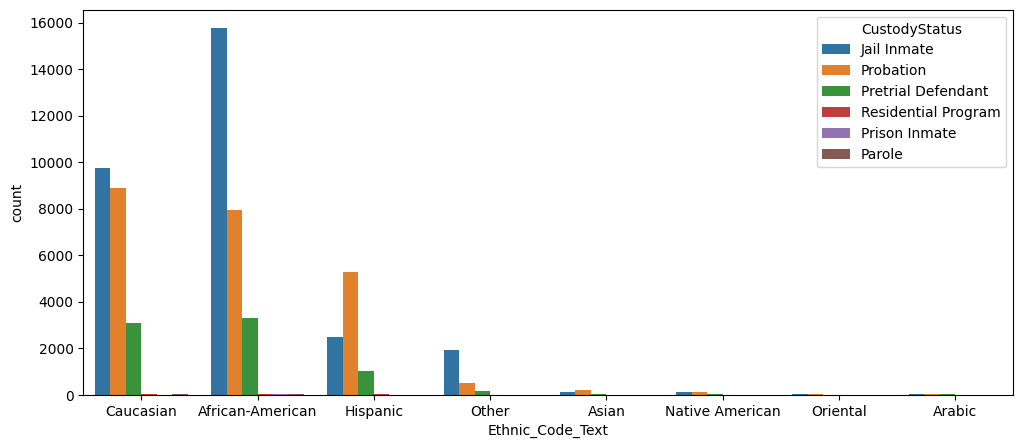

In [19]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Ethnic_Code_Text', hue='CustodyStatus')
plt.title("Distribution  des origines en fonction du  CustodyStatus")

plt.show()

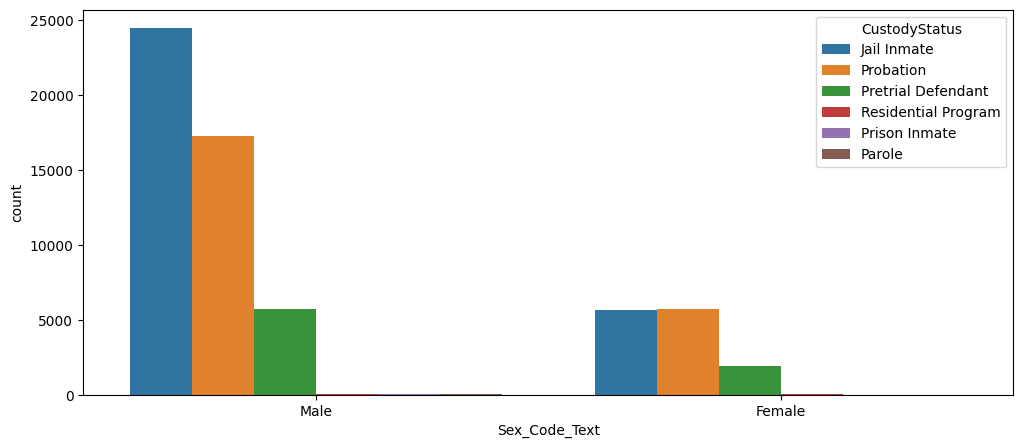

In [20]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Sex_Code_Text', hue='CustodyStatus')
plt.title("Distribution  des sexes en fonction du  CustodyStatus")

plt.show()

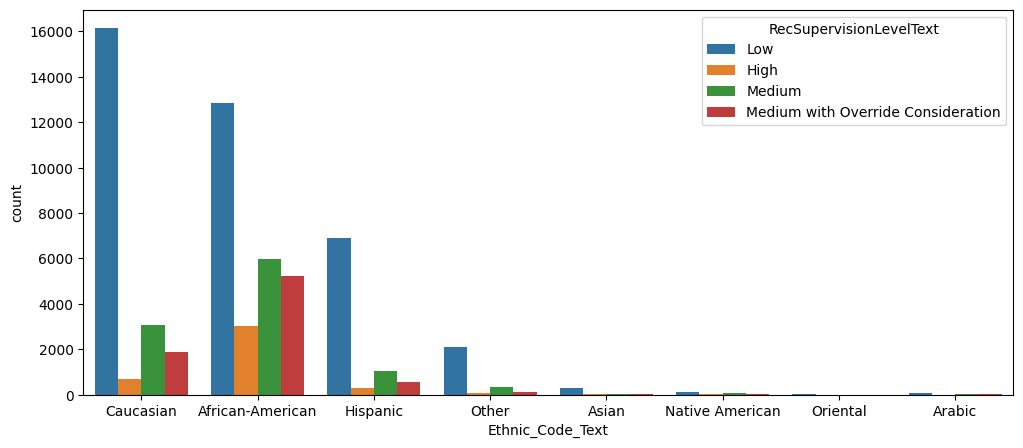

In [21]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Ethnic_Code_Text', hue='RecSupervisionLevelText')
plt.title("Distribution  des Origines en fonction du  RecSupervisionLevelText")

plt.show()

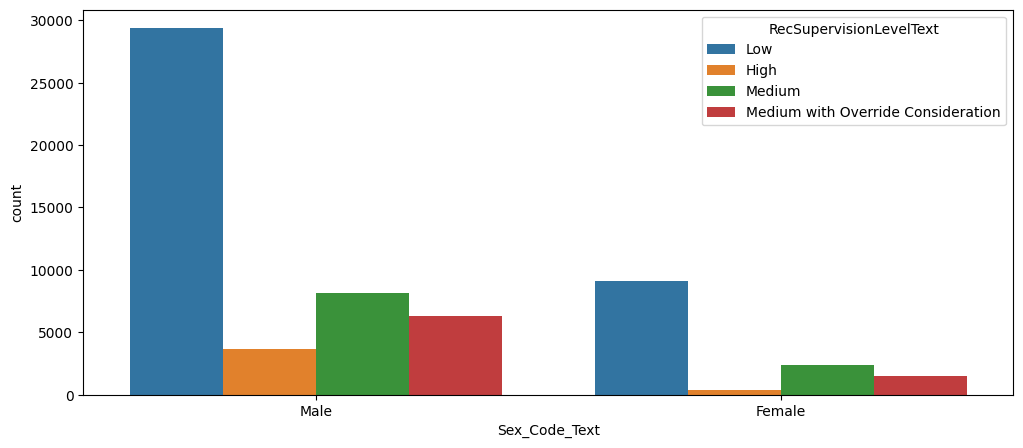

In [22]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Sex_Code_Text', hue='RecSupervisionLevelText')
plt.title("Distribution  des sexes en fonction du  RecSupervisionLevelText")

plt.show()

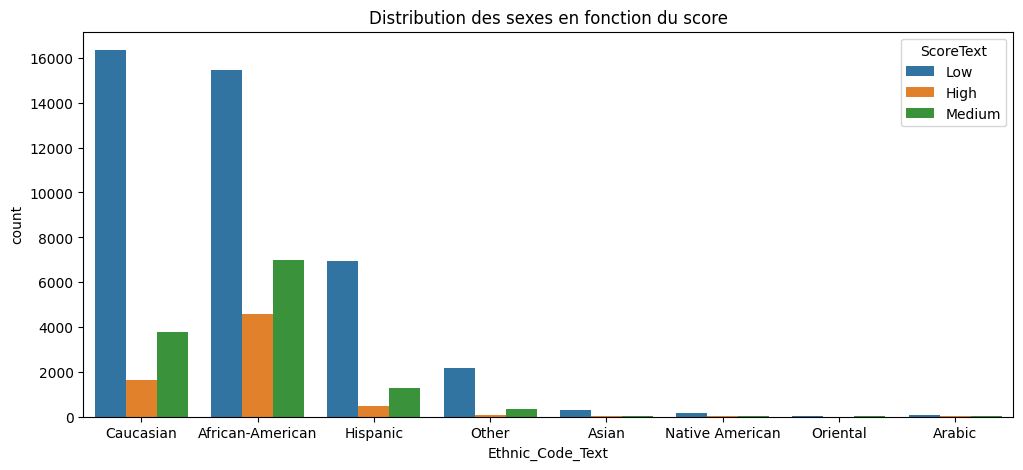

In [67]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Ethnic_Code_Text', hue='ScoreText')
plt.title("Distribution des sexes en fonction du score")

plt.show()

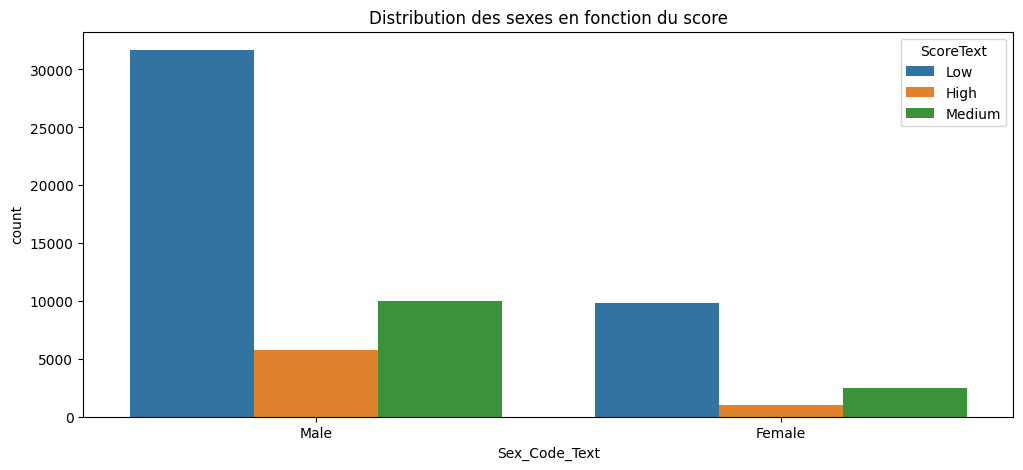

In [65]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Sex_Code_Text', hue='ScoreText')
plt.title("Distribution des sexes en fonction du score")

plt.show()

In [25]:
compas_scores['LegalStatus'].unique()

array(['Pretrial', 'Post Sentence', 'Conditional Release', 'Other',
       'Probation Violator', 'Parole Violator', 'Deferred Sentencing'],
      dtype=object)

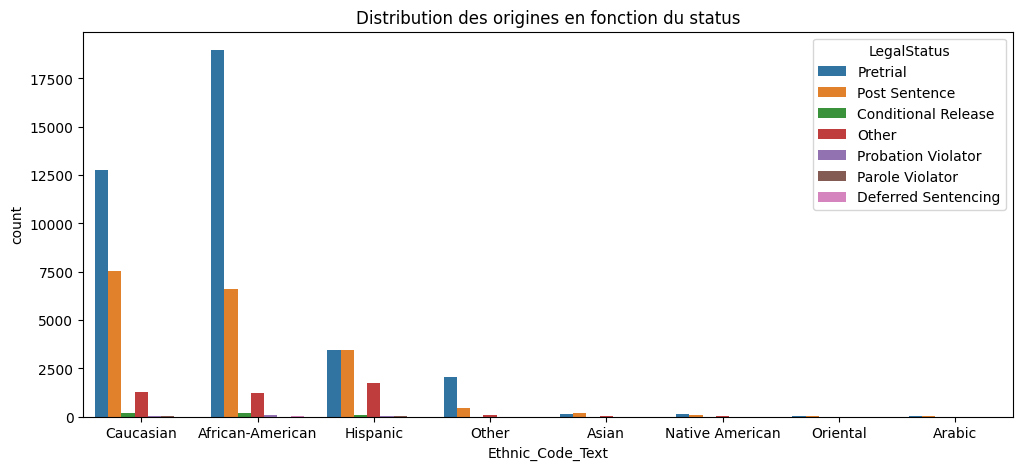

In [64]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Ethnic_Code_Text', hue='LegalStatus')
plt.title("Distribution des origines en fonction du status")

plt.show()

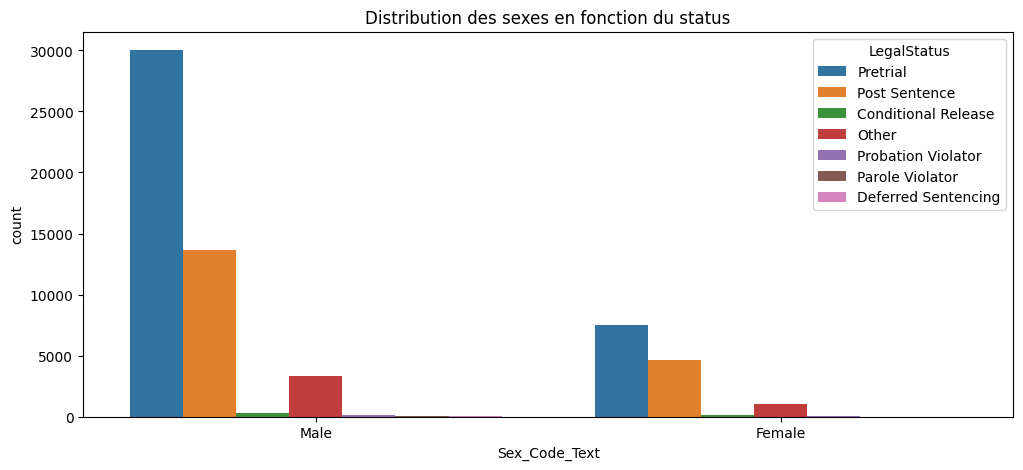

In [63]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Sex_Code_Text', hue='LegalStatus')
plt.title("Distribution des sexes en fonction du status")

plt.show()

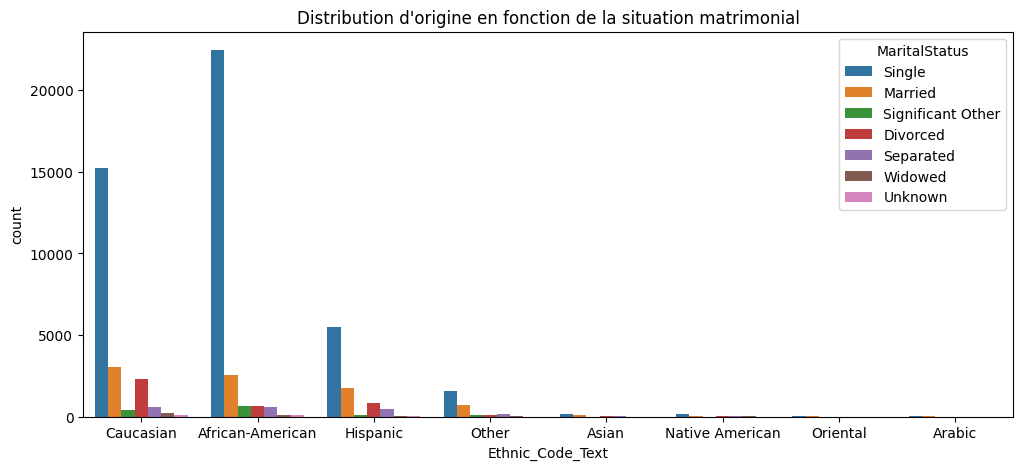

In [62]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Ethnic_Code_Text', hue='MaritalStatus')
plt.title("Distribution d'origine en fonction de la situation matrimonial")

plt.show()

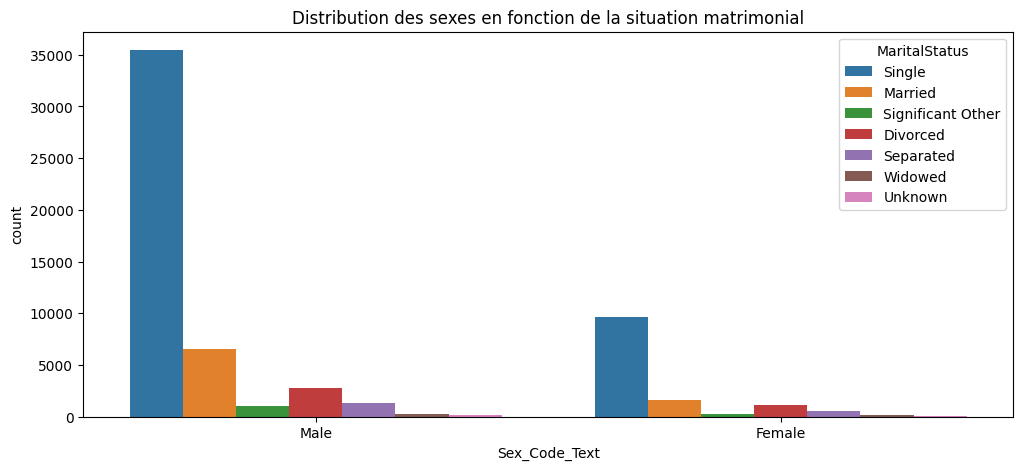

In [61]:
plt.figure(figsize=(12, 5))
sns.countplot(data=compas_scores, x='Sex_Code_Text', hue='MaritalStatus')
plt.title("Distribution des sexes en fonction de la situation matrimonial")

plt.show()

# Analyse de la violent_parsed data

In [30]:
violent_parsed

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,alexsandra,beauchamps,29/12/2014,Female,21/12/1984,31,25 - 45,African-American,...,Risk of Violence,4,Low,29/12/2014,28/12/2014,07/01/2015,5,9,459,0
18312,NaN,winston gregory,winston,gregory,14/01/2014,Male,01/10/1958,57,Greater than 45,Other,...,Risk of Violence,1,Low,14/01/2014,13/01/2014,14/01/2014,0,0,808,0
18313,NaN,farrah jean,farrah,jean,09/03/2014,Female,17/11/1982,33,25 - 45,African-American,...,Risk of Violence,2,Low,09/03/2014,08/03/2014,09/03/2014,3,0,754,0
18314,NaN,florencia sanmartin,florencia,sanmartin,30/06/2014,Female,18/12/1992,23,Less than 25,Hispanic,...,Risk of Violence,4,Low,30/06/2014,15/03/2015,15/03/2015,2,0,258,0


In [31]:
# Visualisation d'information de la dataset
violent_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   compas_screening_date    18316 non-null  object 
 5   sex                      18316 non-null  object 
 6   dob                      18316 non-null  object 
 7   age                      18316 non-null  int64  
 8   age_cat                  18316 non-null  object 
 9   race                     18316 non-null  object 
 10  juv_fel_count            18316 non-null  int64  
 11  decile_score             18316 non-null  int64  
 12  juv_misd_count           18316 non-null  int64  
 13  juv_other_count          18316 non-null  int64  
 14  priors_count          

<Axes: >

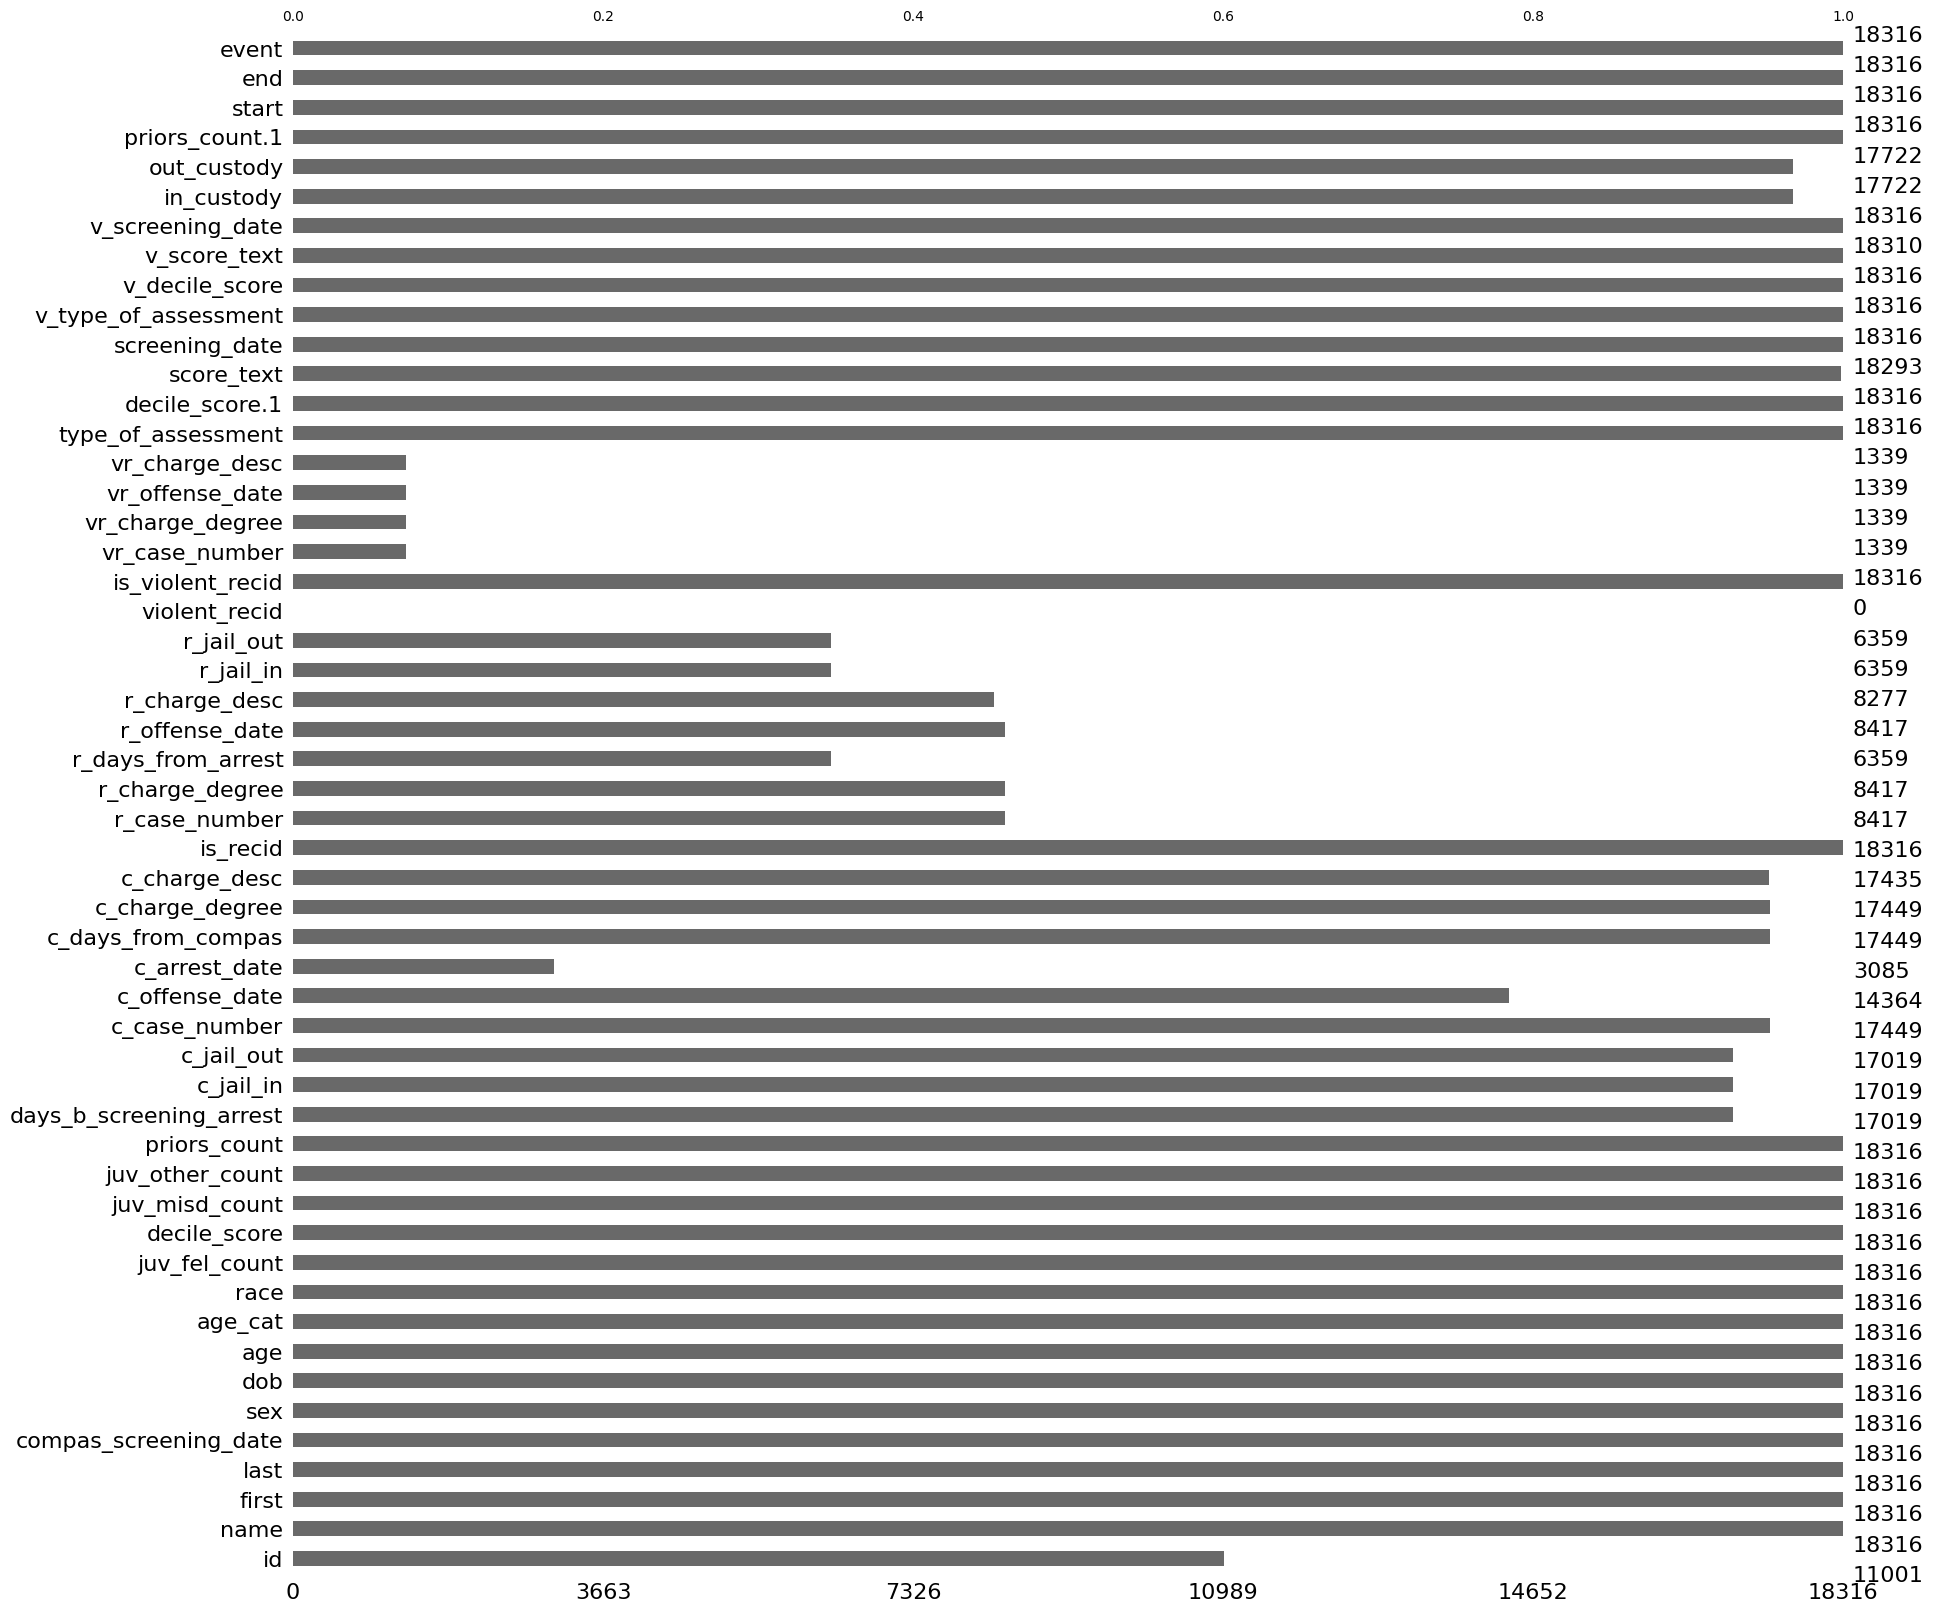

In [32]:
# Visualisation des valeurs manquantes
msno.bar(violent_parsed, figsize=(20, 20))

In [33]:
# Suppression des colonnes comportant des valeurs manque a plus de 50%
violent_parsed= violent_parsed.drop(['id','vr_case_number','vr_charge_degree','vr_offense_date','vr_charge_desc','violent_recid','r_days_from_arrest','r_offense_date','r_charge_desc','r_jail_in','r_jail_out','c_arrest_date','c_offense_date','r_case_number','r_charge_degree'], axis=1)

In [34]:
# Suppression des lignes comportant des valeurs manquants
violent_parsed = violent_parsed.dropna(how='any')
rows_with_nan_ = violent_parsed[violent_parsed.isna().any(axis=1)]

# Afficher les lignes contenant des NaN
violent_parsed.isnull().sum()

name                       0
first                      0
last                       0
compas_screening_date      0
sex                        0
dob                        0
age                        0
age_cat                    0
race                       0
juv_fel_count              0
decile_score               0
juv_misd_count             0
juv_other_count            0
priors_count               0
days_b_screening_arrest    0
c_jail_in                  0
c_jail_out                 0
c_case_number              0
c_days_from_compas         0
c_charge_degree            0
c_charge_desc              0
is_recid                   0
is_violent_recid           0
type_of_assessment         0
decile_score.1             0
score_text                 0
screening_date             0
v_type_of_assessment       0
v_decile_score             0
v_score_text               0
v_screening_date           0
in_custody                 0
out_custody                0
priors_count.1             0
start         

<Axes: >

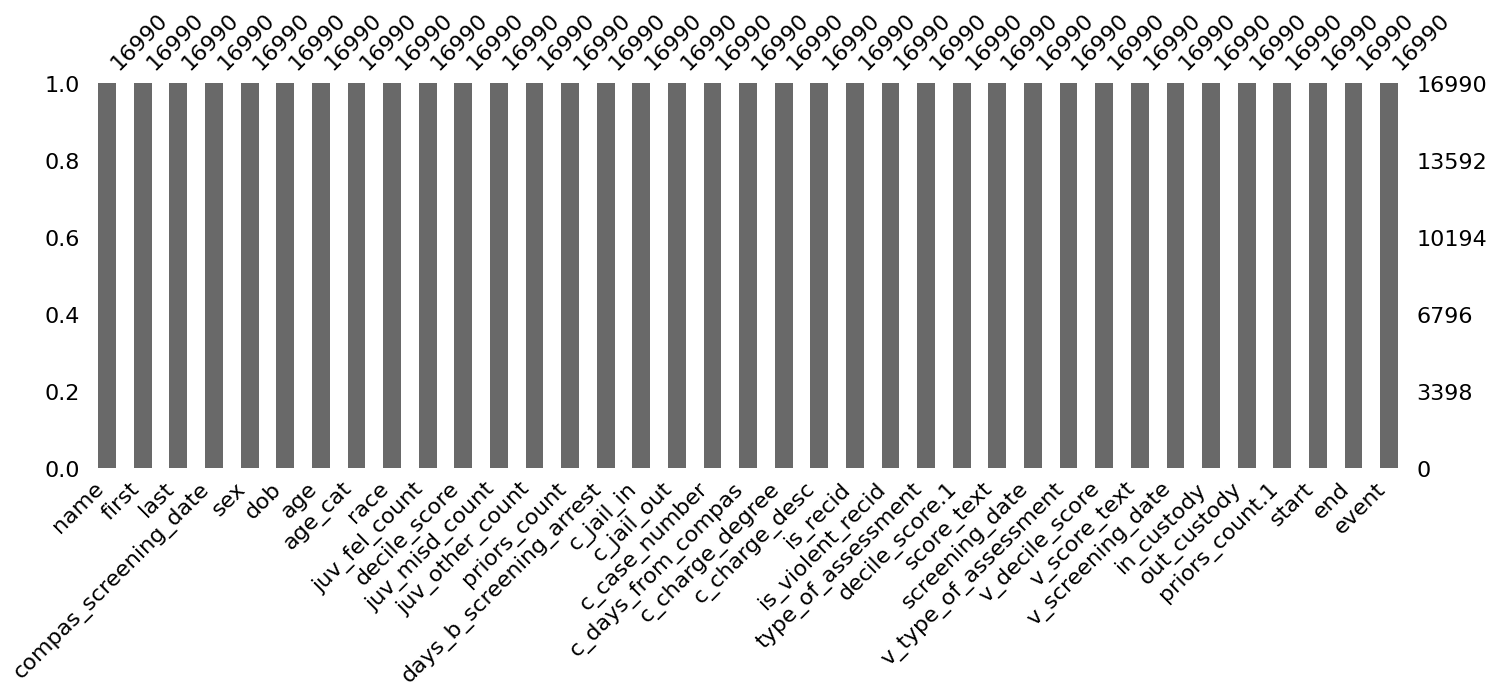

In [35]:
msno.bar(violent_parsed, figsize=(17, 5))

In [36]:
violent_parsed

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
3,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,0,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,0,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0
5,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,0,...,Risk of Violence,3,Low,14/04/2013,30/07/2013,08/11/2013,4,63,107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,alexsandra beauchamps,alexsandra,beauchamps,29/12/2014,Female,21/12/1984,31,25 - 45,African-American,0,...,Risk of Violence,4,Low,29/12/2014,28/12/2014,07/01/2015,5,9,459,0
18312,winston gregory,winston,gregory,14/01/2014,Male,01/10/1958,57,Greater than 45,Other,0,...,Risk of Violence,1,Low,14/01/2014,13/01/2014,14/01/2014,0,0,808,0
18313,farrah jean,farrah,jean,09/03/2014,Female,17/11/1982,33,25 - 45,African-American,0,...,Risk of Violence,2,Low,09/03/2014,08/03/2014,09/03/2014,3,0,754,0
18314,florencia sanmartin,florencia,sanmartin,30/06/2014,Female,18/12/1992,23,Less than 25,Hispanic,0,...,Risk of Violence,4,Low,30/06/2014,15/03/2015,15/03/2015,2,0,258,0


In [37]:
# Visualisation des colonnes de type object

violent_parsed.select_dtypes(include=["object"]).columns.tolist()

['name',
 'first',
 'last',
 'compas_screening_date',
 'sex',
 'dob',
 'age_cat',
 'race',
 'c_jail_in',
 'c_jail_out',
 'c_case_number',
 'c_charge_degree',
 'c_charge_desc',
 'type_of_assessment',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_score_text',
 'v_screening_date',
 'in_custody',
 'out_custody']

# Data Visualisation

## **Data viz des valeurs numerique**

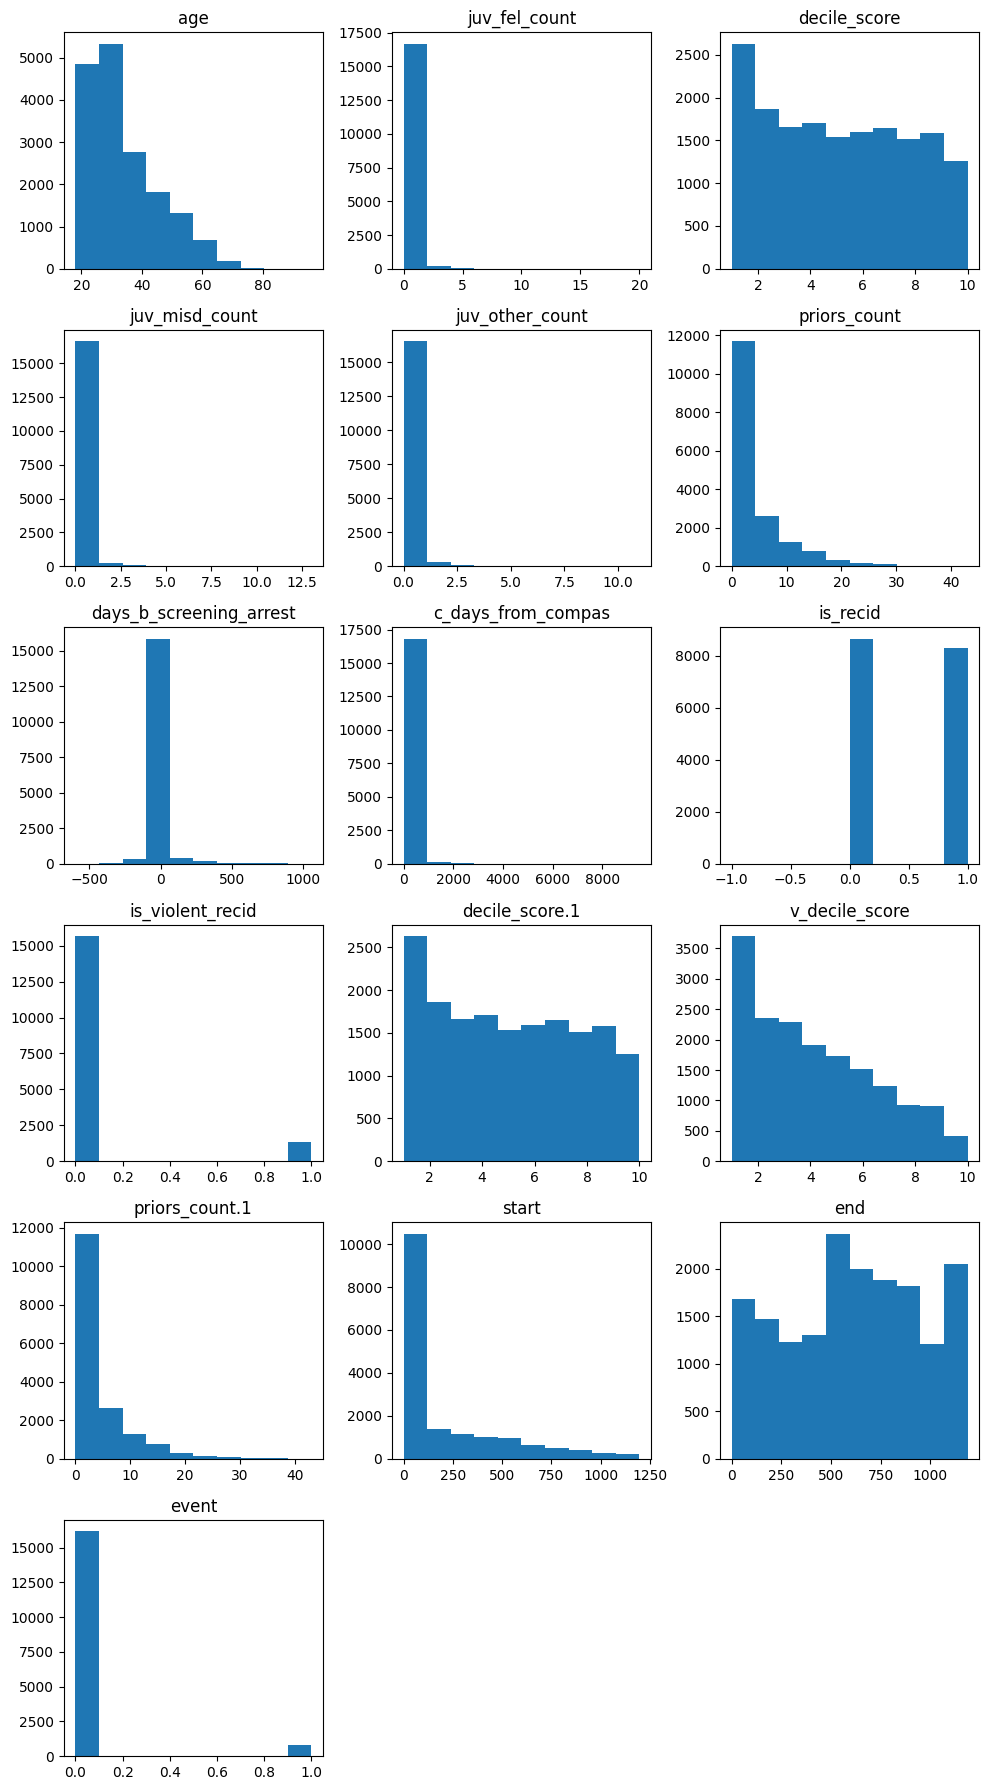

In [38]:

numeric_cols = violent_parsed.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Calcul du nombre de lignes et de colonnes nécessaires pour afficher les histogrammes
num_cols = len(numeric_cols)
num_rows = (num_cols - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 3*num_rows))

for i, col in enumerate(numeric_cols):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    ax.hist(violent_parsed[col].dropna(), bins=10)
    ax.set_title(col)

# Suppression des axes inutiles
for i in range(num_cols, num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

# Ajustement des espacements entre les graphiques
fig.tight_layout()

plt.show()

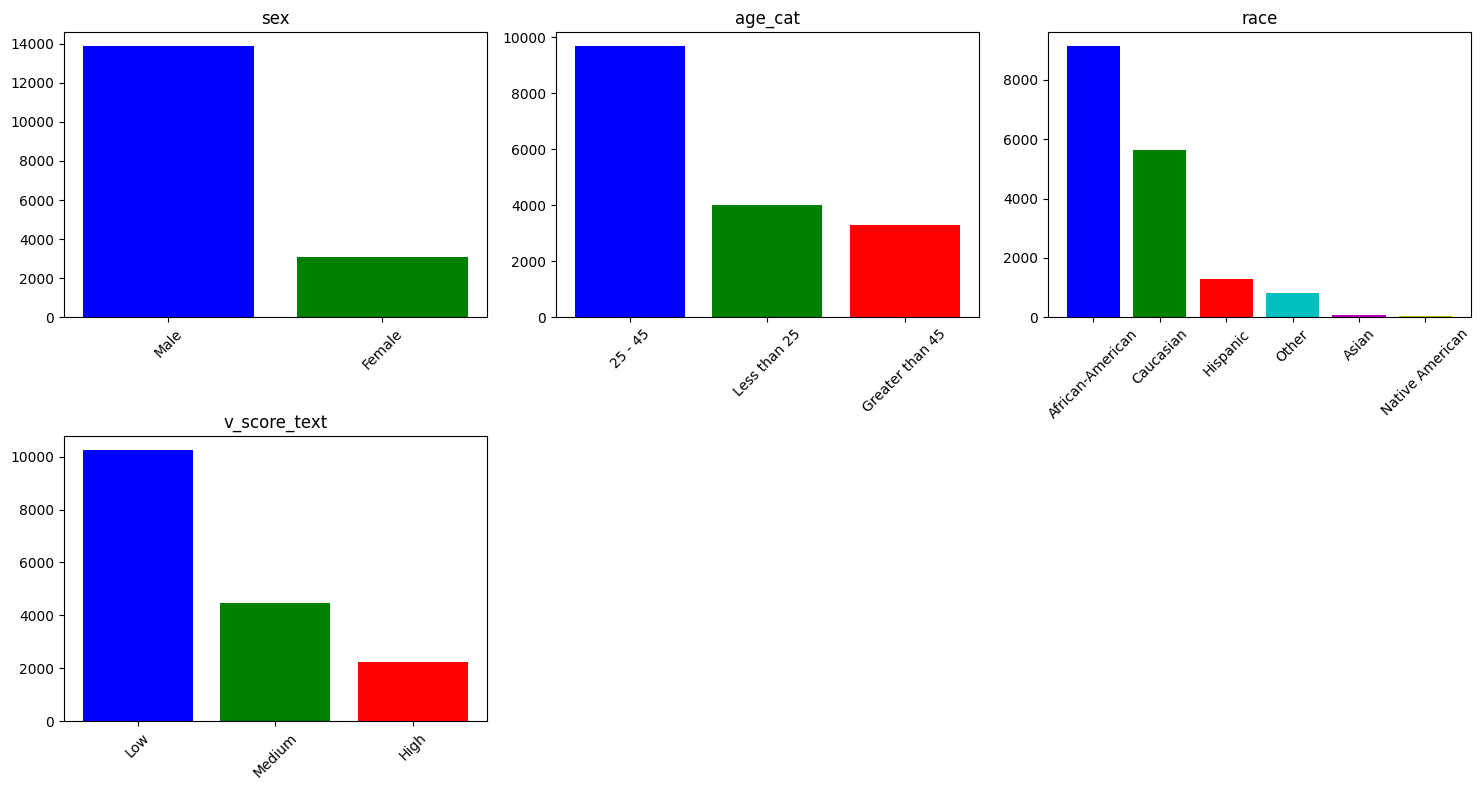

In [44]:
# Tracé de l'histogramme de chaque colonne catégorielle

# Sélection des colonnes catégorielles
# Sélection des colonnes catégorielles
x= violent_parsed[["sex","age_cat","race","v_score_text"]]
categorical_cols = x.select_dtypes(include=["object"]).columns.tolist()

# Calcul du nombre de lignes et de colonnes nécessaires pour afficher les diagrammes en bande
num_cols = len(categorical_cols)
num_rows = (num_cols - 1) // 3 + 1

# Spécification des couleurs pour chaque catégorie
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Tracé du diagramme en bande pour chaque colonne catégorielle
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4*num_rows))

for i, col in enumerate(categorical_cols):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    counts = x[col].value_counts()
    bars = ax.bar(counts.index, counts, color=colors[:len(counts)])
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)
    # Ajout d'une légende pour les couleurs
    if len(counts) > len(colors):
        ax.legend(bars, counts.index, bbox_to_anchor=(0.2, 1), loc='upper left')

# Suppression des axes inutiles
for i in range(num_cols, num_rows*3):
    row_idx = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row_idx, col_idx])

# Ajustement des espacements entre les graphiques
fig.tight_layout()

plt.show()



In [ ]:
# La repartition des sexes dans la dataset
sex_value= violent_parsed['sex'].value_counts()
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

plt.pie(sex_value, labels=sex_value.index, colors=palette_color,explode=explode, autopct='%.0f%%')
plt.title("La repartition des sexes dans la dataset")

plt.show()


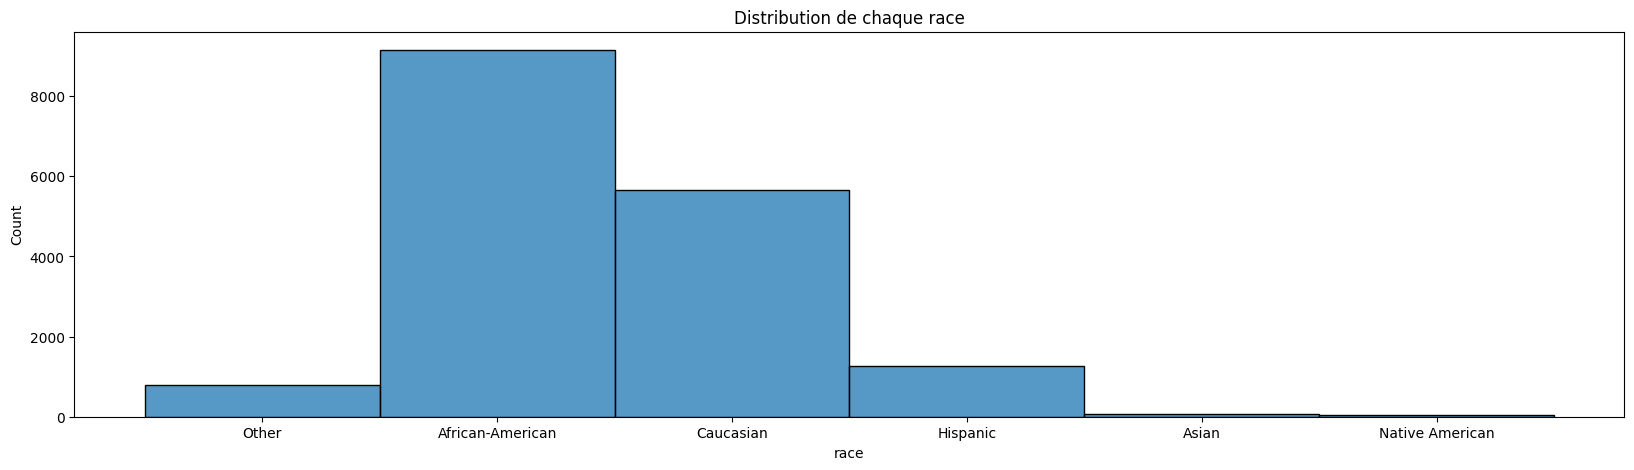

In [60]:
# Visualisation de la distribution de chaque race
plt.figure(figsize=(20, 5))
sns.histplot(violent_parsed['race'], kde=False)
plt.title("Distribution de chaque race")

plt.show()

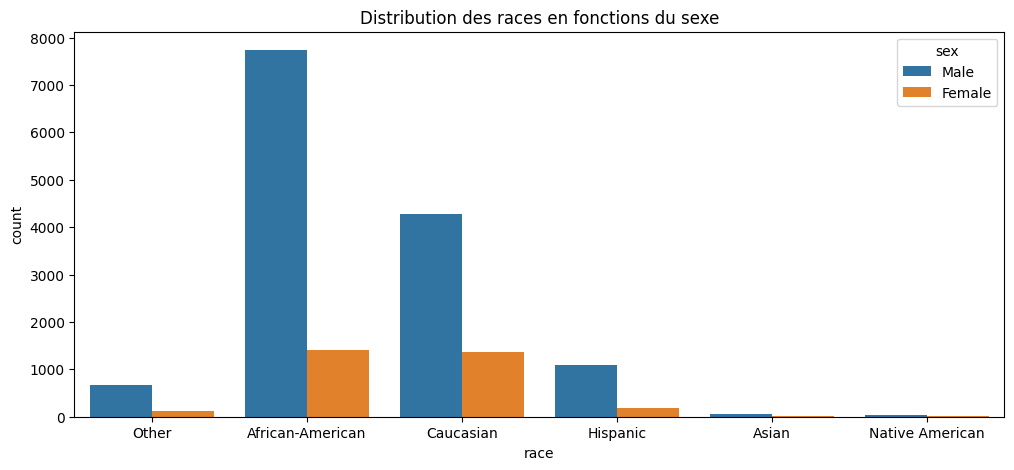

In [59]:
# Distribution des races en fonctions du sexe
plt.figure(figsize=(12, 5))
sns.countplot(data=violent_parsed, x='race', hue='sex')
plt.title("Distribution des races en fonctions du sexe")

plt.show()

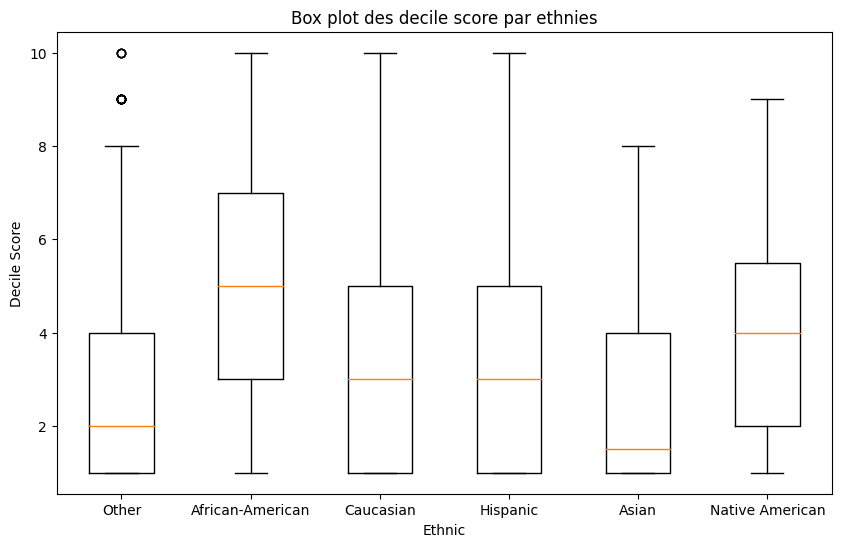

In [48]:
# Box plot des decilescore sur les ethnies
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(
    [violent_parsed[violent_parsed['race'] == z]['v_decile_score'] for z in violent_parsed['race'].unique()],
    labels=violent_parsed['race'].unique()
)

ax.set_xlabel('Ethnic')
ax.set_ylabel('Decile Score')
ax.set_title('Box plot des decile score par ethnies')
plt.show()

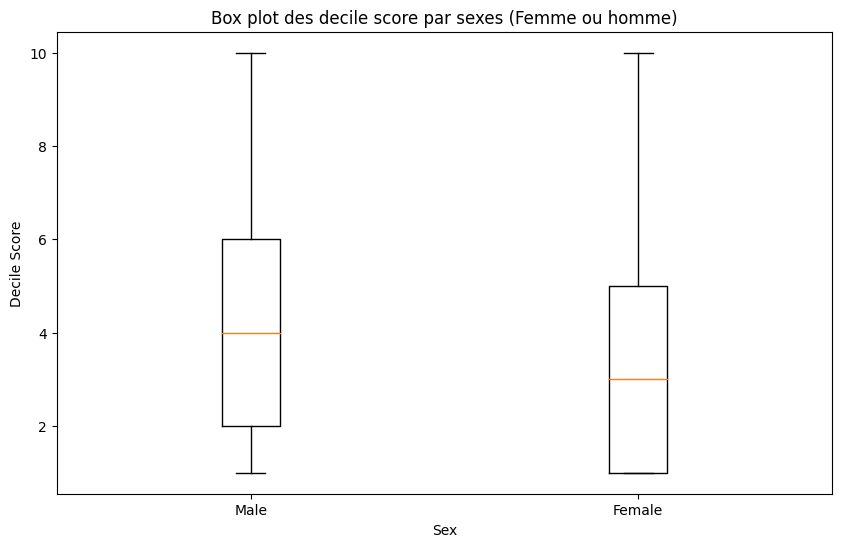

In [49]:
# Box plot des decile score par sexes
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(
    [violent_parsed[violent_parsed['sex'] == z]['v_decile_score'] for z in violent_parsed['sex'].unique()],
    labels=violent_parsed['sex'].unique()
)

ax.set_xlabel('Sex')
ax.set_ylabel('Decile Score')
ax.set_title('Box plot des decile score par sexes (Femme ou homme)')
plt.show()

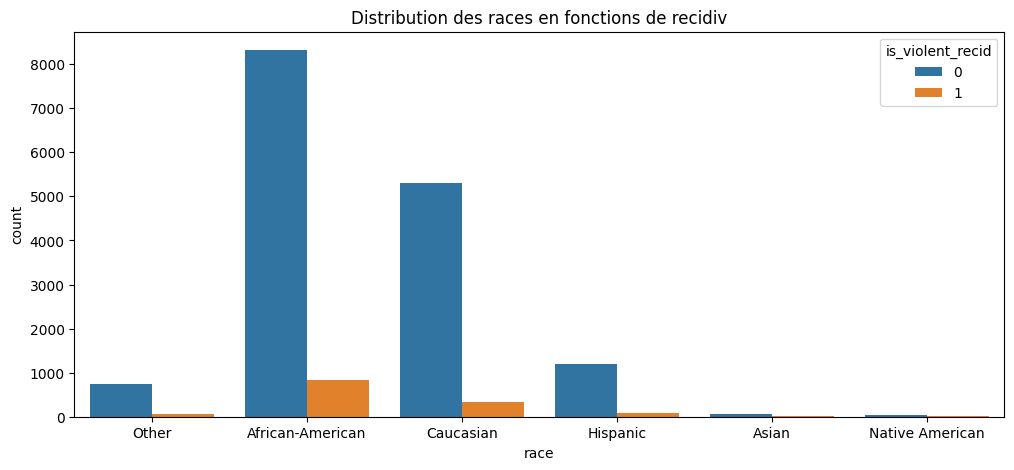

In [58]:
# Distribution des races en fonctions de recidiv 

plt.figure(figsize=(12, 5))
sns.countplot(data=violent_parsed, x='race', hue='is_violent_recid')
plt.title("Distribution des races en fonctions de recidiv")

plt.show()

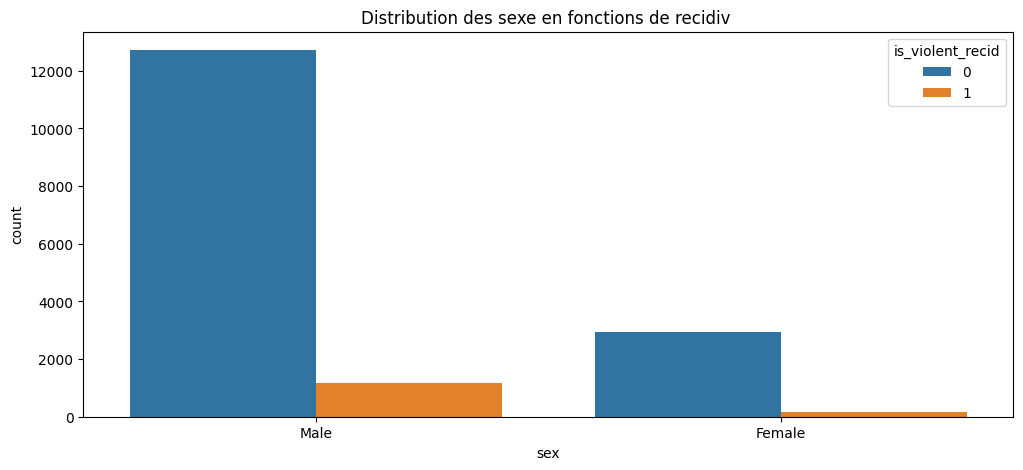

In [57]:
# Distribution des sexe en fonctions de recidiv 

plt.figure(figsize=(12, 5))
sns.countplot(data=violent_parsed, x='sex', hue='is_violent_recid')
plt.title("Distribution des sexe en fonctions de recidiv ")

plt.show()

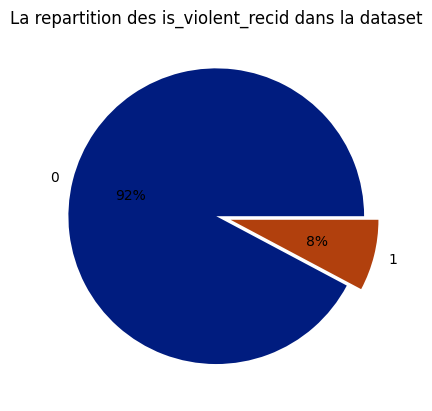

In [56]:
# La repartition des is_violent_recid dans la dataset
sex_value= violent_parsed['is_violent_recid'].value_counts()
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

plt.pie(sex_value, labels=sex_value.index, colors=palette_color,explode=explode, autopct='%.0f%%')
plt.title("La repartition des is_violent_recid dans la dataset")

plt.show()